## 4th assignment NLP Part B - Question 2 - Aris Tsilifonis mtn 2323

In [ ]:
import os
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Question 2: Use Glove-6B-100d pretrained word embeddings and compare results

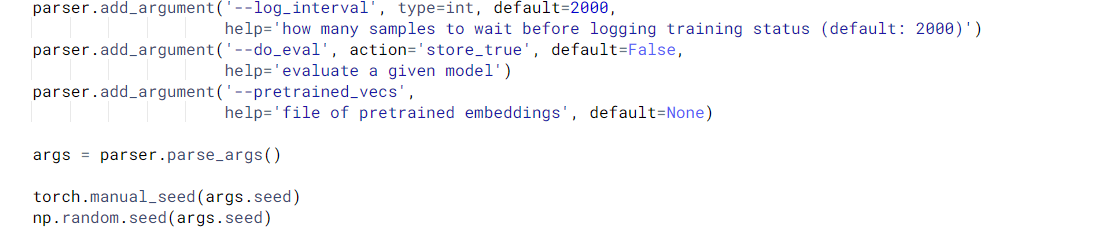

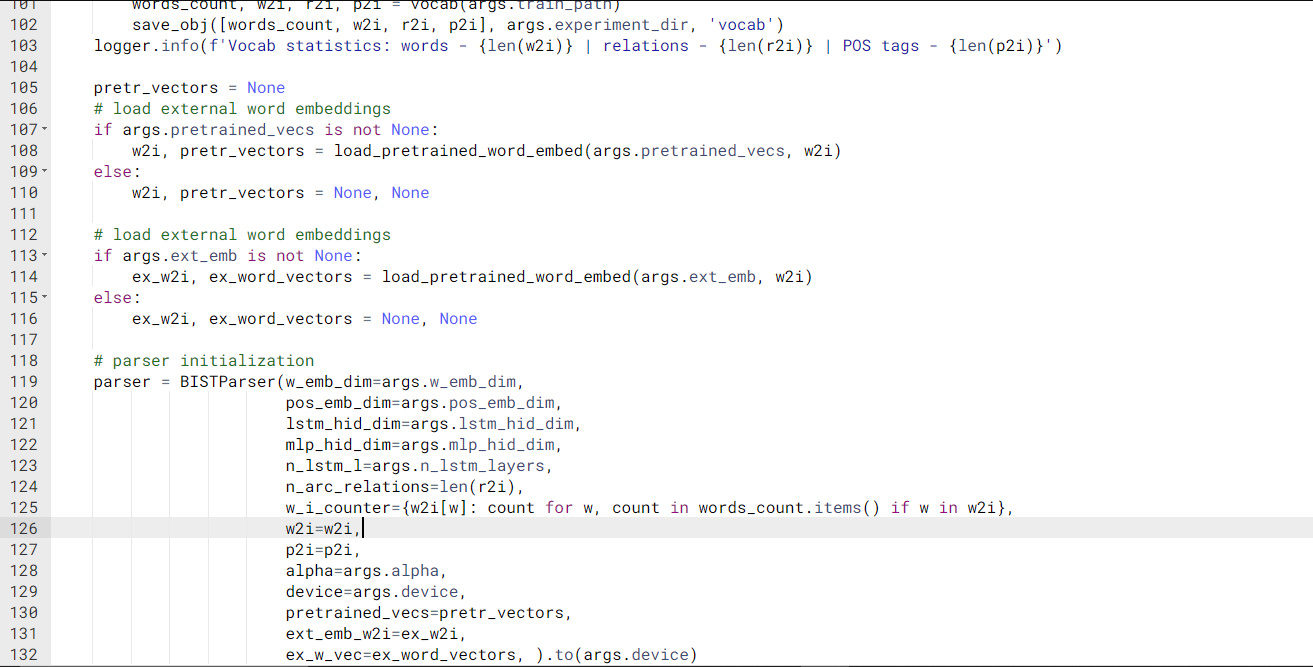

Inside the main.py file we applied the changes above. We included pretrained glove embeddings with one additional argument, as it can be seen in the first picture. Then, we load those embeddings with the load_pretrained_word_embed function that already exists in the code. We pass these parameters (w2i, pretrained vectors) to the BISTParser. The expression {w2i[w]: count for w, count in words_count.items() if w in w2i} is a dictionary comprehension. It constructs a dictionary by iterating over each word and its count in words_count. The new addition {if w in w2i} ensures that only words present in the w2i dictionary are included in the new dictionary (otherwise an error occurs).

It has to be mentioned that original code introduced an argument, namely ext_emb, to handle external embeddings. Basically, it concatenated given embeddings with the randomly initialized ones. The target was to replace the random embeddings with the provided ones. So, the pretrained embeddings had to be passed explicitly to the BISTParser with a new argument.

On this experiment, word embeddings inside BISTParser are initialized from pretrained vectors.

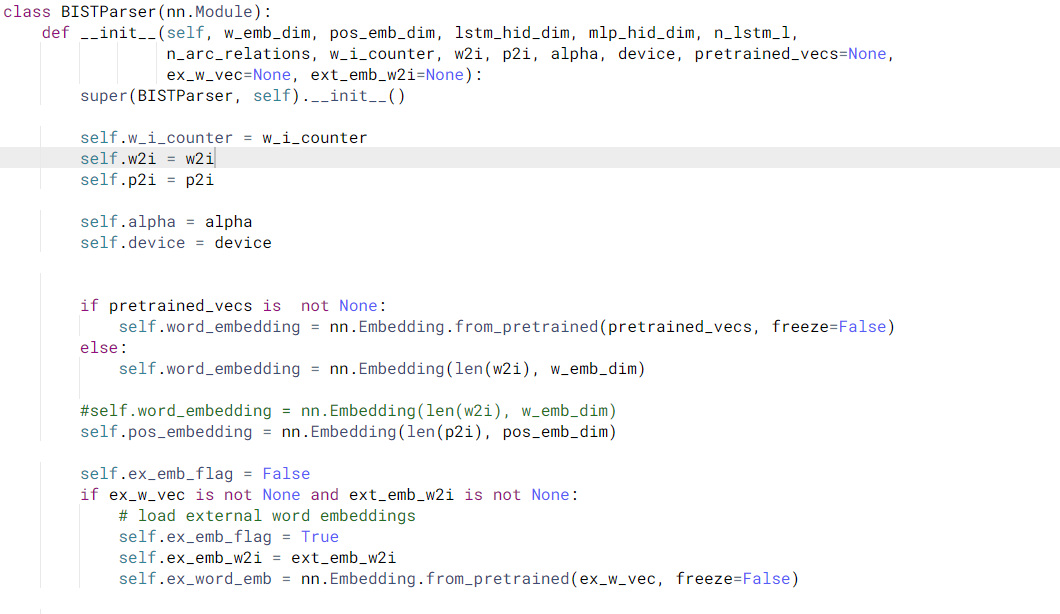

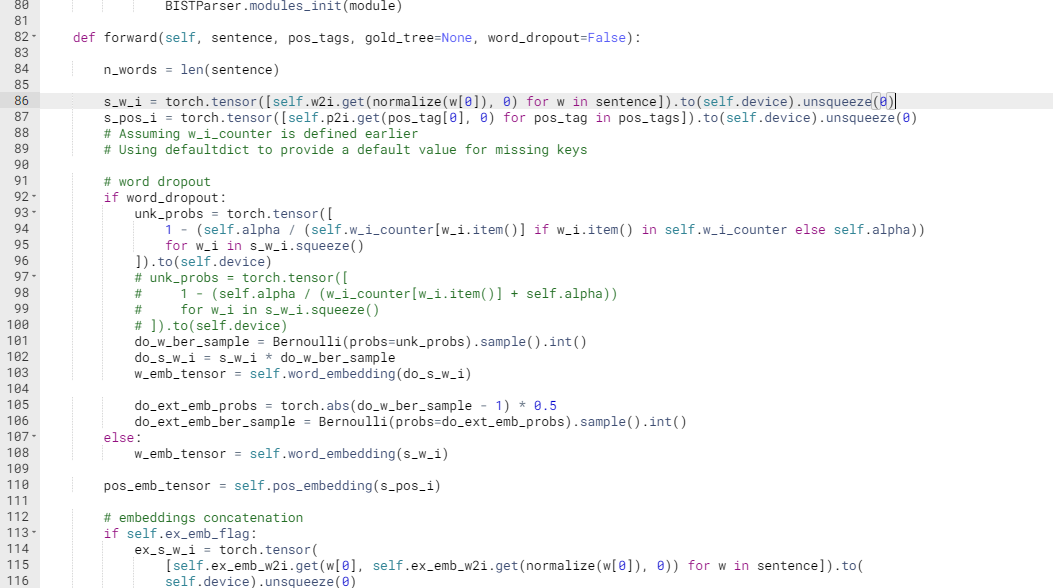

We fixed a keyerror inside forward method by introducing a new unk_probs calculation.  We handled missing words by assigning self.alpha in the absence of the word in self.w_i_counter

Regarding the scores, this version achieved
 - las:92.17 uas: 93.62 which is around 0.07 to 0.1% better than the scores from B1 version. They are significantly better than the best scores from transition based parser.

In [ ]:
os.chdir('/content/drive/MyDrive/Assignment-4-DependencyParsing/Q_B2')
!python main.py --n_lstm_layers 1 --pretrained_vecs "/content/drive/MyDrive/Assignment-4-DependencyParsing/glove.6B.100d.txt"

2024-06-21 11:11:27,909 - INFO - Experiment Parameters - 
{'train_path': 'data/train.conll', 'dev_path': 'data/dev.conll', 'test_path': 'data/test.conll', 'ds_name': 'ptb', 'model_dir': None, 'ext_emb': None, 'seed': 1234, 'epochs': 5, 'lr': 0.001, 'alpha': 0.25, 'w_emb_dim': 100, 'pos_emb_dim': 25, 'lstm_hid_dim': 125, 'mlp_hid_dim': 100, 'n_lstm_layers': 1, 'no_cuda': False, 'log_interval': 2000, 'do_eval': False, 'pretrained_vecs': '/content/drive/MyDrive/Assignment-4-DependencyParsing/glove.6B.100d.txt', 'experiment_dir': './results/ds=ptb_epochs=5_lr=0.001_seed=1234_extEmb=False_wDim=100_pDim=25_lstmDim=125_mlpDim=100_lstmN=1_date=06_21_2024'}
2024-06-21 11:11:31,440 - INFO - Vocab statistics: words - 34327 | relations - 40 | POS tags - 19
2024-06-21 11:11:58,605 - INFO - -----------+-----------+-----------+-----------+-----------
2024-06-21 11:11:58,606 - INFO - Train epoch: 1
2024-06-21 11:11:59,027 - INFO - [0/39832 (0%)]
2024-06-21 11:14:23,658 - INFO - [2000/39832 (5%)]
2024-

In [ ]:
!python main.py --n_lstm_layers 1 --pretrained_vecs "/content/drive/MyDrive/Assignment-4-DependencyParsing/glove.6B.100d.txt" --do_eval --model_dir "/content/drive/MyDrive/Assignment-4-DependencyParsing/Q_B2/results/ds=ptb_epochs=5_lr=0.001_seed=1234_extEmb=False_wDim=100_pDim=25_lstmDim=125_mlpDim=100_lstmN=1_date=06_17_2024"

2024-06-21 15:21:48,195 - INFO - Experiment Parameters - 
{'train_path': 'data/train.conll', 'dev_path': 'data/dev.conll', 'test_path': 'data/test.conll', 'ds_name': 'ptb', 'model_dir': '/content/drive/MyDrive/Assignment-4-DependencyParsing/Q_B2/results/ds=ptb_epochs=5_lr=0.001_seed=1234_extEmb=False_wDim=100_pDim=25_lstmDim=125_mlpDim=100_lstmN=1_date=06_17_2024', 'ext_emb': None, 'seed': 1234, 'epochs': 5, 'lr': 0.001, 'alpha': 0.25, 'w_emb_dim': 100, 'pos_emb_dim': 25, 'lstm_hid_dim': 125, 'mlp_hid_dim': 100, 'n_lstm_layers': 1, 'no_cuda': False, 'log_interval': 2000, 'do_eval': True, 'pretrained_vecs': '/content/drive/MyDrive/Assignment-4-DependencyParsing/glove.6B.100d.txt', 'experiment_dir': '/content/drive/MyDrive/Assignment-4-DependencyParsing/Q_B2/results/ds=ptb_epochs=5_lr=0.001_seed=1234_extEmb=False_wDim=100_pDim=25_lstmDim=125_mlpDim=100_lstmN=1_date=06_17_2024'}
2024-06-21 15:21:48,215 - INFO - Vocab statistics: words - 34327 | relations - 40 | POS tags - 19
2024-06-21 15